<a href="https://colab.research.google.com/github/thellamsneha13/sneha-thellam-repository/blob/main/Assessment2B_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [37]:
pip install pyspark

     |████████████████████████████████| 281.4 MB 21 kB/s 
     |████████████████████████████████| 198 kB 47.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=4ef9dfdc54c64090b25bdb560df21f4f23e01be270a538522f578c627a30c046
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [38]:
import pandas as pd
import numpy as np
import pyspark.sql.functions as F

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [4]:
df1=pd.read_csv('college_1.csv')
df1.head(5)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0


In [3]:
df2=pd.read_csv('college_2.csv')
df2.head(5)

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
0,ASHOK KUMAR K,100,0,31,9,19400,19400,Electronics and Electrical Engineering,0
1,Chandru,0,20,0,0,14150,14490,Computer Science and Engineering,340
2,Ganesh Ramkumar R,-1,55,24,6,8790,10790,Computer Science and Engineering,2000
3,Bodipudi Harini,-1,0,35,-1,10040,10040,Electronics and Communication Engineering,0
4,VIINU V P,-1,100,24,-1,9150,9150,Electronics and Electrical Engineering,0


In [9]:
df=df1.merge(df2, on=['Name','python','mysql','Previous Geekions','CodeKata Score','Department','Rising'],how='outer')
df.head(3)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1208: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


In [23]:
df=df.rename(columns={'CodeKata Score':'Codekata_Score','Previous Geekions':'Previous_Geekions'})
df.head(3)

,Name,python,mysql,Previous_Geekions,Codekata_Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


In [29]:
exceeded_expectation=df[df.Codekata_Score > 15000]
exceeded_expectation.to_csv('exceeded_expectation.csv', sep='\t', index=False)
exceeded_expectation.head(5)

,Name,python,mysql,Previous_Geekions,Codekata_Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
84,ASHOK KUMAR K,100.0,31.0,19400,19400,Electronics and Electrical Engineering,0,0.0,9.0


###### if  10000<codekata score<15000   (Reached_expectations.csv)



In [30]:
Reached_expectations=df[(df.Codekata_Score > 10000) & (df.Codekata_Score <15000)]
Reached_expectations.to_csv('Reached_expectations.csv', sep='\t', index=False)
Reached_expectations.head(3)

,Name,python,mysql,Previous_Geekions,Codekata_Score,Department,Rising,python_en,computational_thinking
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
85,Chandru,0.0,0.0,14150,14490,Computer Science and Engineering,340,20.0,0.0
86,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0


###### if  7000<codekata score<10000   (Needs_Improvement.csv)


In [32]:
Needs_Improvement=df[(df.Codekata_Score > 7000) & (df.Codekata_Score < 10000)]
Needs_Improvement.to_csv('Needs_Improvement.csv', sep='\t', index=False)
Needs_Improvement.head(3)

,Name,python,mysql,Previous_Geekions,Codekata_Score,Department,Rising,python_en,computational_thinking
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
5,NIVEESHWAR S,100.0,0.0,8200,8200,Computer Science and Engineering,0,NaN,NaN
6,KALAIARASAN K,85.0,47.0,7750,7880,Electronics and Communication Engineering,130,NaN,NaN


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [33]:
Unsatisfactory=df[df.Codekata_Score < 7000]
Unsatisfactory.to_csv('Unsatisfactory.csv', sep='\t', index=False)
Unsatisfactory.head(3)

,Name,python,mysql,Previous_Geekions,Codekata_Score,Department,Rising,python_en,computational_thinking
8,J.SUGANTHI,27.0,50.0,5860,5860,Electronics and Communication Engineering,0,NaN,NaN
9,thamizhpaana,29.0,0.0,5500,5500,Computer Science and Engineering,0,NaN,NaN
10,Iyappan Samiraj,50.0,24.0,5400,5400,Electronics and Communication Engineering,0,NaN,NaN


###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [40]:
avg_df=df.groupby('Name')['Previous_Geekions','Codekata_Score'].mean()
avg_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Previous_Geekions,Codekata_Score
Name,,
Poojitha Y,7210.0,8970.0
A.Dharani,24500.0,24500.0
ABIRAMI.S,1580.0,1580.0
AMARNATH D,1890.0,1890.0
ASHOK KUMAR K,19400.0,19400.0


###### No of students participated 

In [41]:
avg_df.count()

Previous_Geekions    119
Codekata_Score       119
dtype: int64

###### #Average completion of python course or my_sql or python english or computational thinking

In [43]:
avg_com=df.groupby('Name')['python','mysql','python_en','computational_thinking'].mean()
avg_com.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,python,mysql,python_en,computational_thinking
Name,,,,
Poojitha Y,0.0,35.0,78.0,0.0
A.Dharani,82.0,20.0,NaN,NaN
ABIRAMI.S,82.0,0.0,NaN,NaN
AMARNATH D,-1.0,12.0,52.0,-1.0
ASHOK KUMAR K,100.0,31.0,0.0,9.0


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [57]:
df.sort_values(by='Codekata_Score',ascending=False)['Name'].unique()[0:3:]


array(['A.Dharani', 'V.JEEVITHA ', 'HEMAVATHI.R'], dtype=object)

###### Shining stars of the week (top 3 candidates who has highest geekions)

In [58]:
df.sort_values(by='Previous_Geekions',ascending=False)['Name'].unique()[0:3:]

array(['A.Dharani', 'V.JEEVITHA ', 'HEMAVATHI.R'], dtype=object)

###### Department wise codekata performence (pie chart)

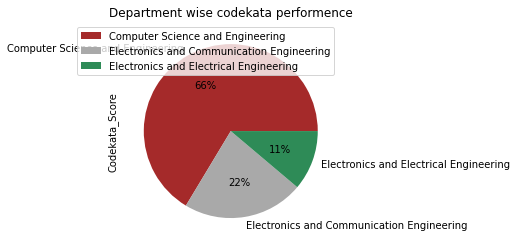

In [81]:
import matplotlib.pyplot as plt
df.groupby(['Department']).sum().plot(kind='pie', y='Codekata_Score',
                                      autopct='%1.0f%%',
                                colors = ['brown', 'darkgrey', 'seagreen'],
                                title='Department wise codekata performence')


###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [91]:
dep_df=df.groupby(['Department','Name'])['Codekata_Score'].sum()
dep_df.head()


Department                        Name                
Computer Science and Engineering   Poojitha Y              8970
                                  A.Dharani               24500
                                  Aravind                   380
                                  Arun                       40
                                  Balaraman Muthupandi     8050
Name: Codekata_Score, dtype: int64

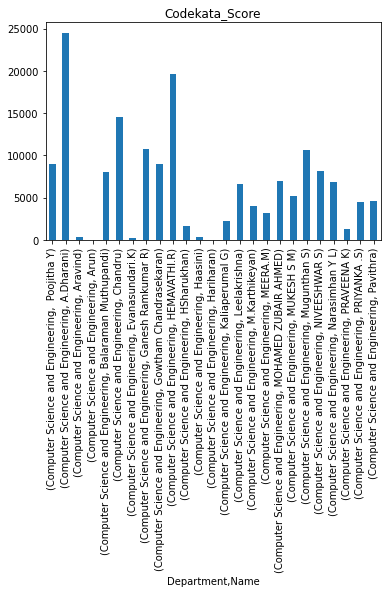

In [95]:
axes = df.groupby(['Department','Name'])['Codekata_Score'].sum().head(25).plot.bar(subplots=True)
